# PROOF OF CONCEPT

In [21]:
import os
import numpy as np
import cv2
import shutil
from PIL import Image
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
from rembg import remove
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet_v2, inception_v3, inception_resnet_v2, efficientnet_v2
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import models

In [2]:
## GLOBAL VARIRABLES
input_shape = (224,224)
channels = 3
epochs = 256
batch_size = 8
preprocessing_function=inception_v3.preprocess_input

## Path Declerations
dataPath = "pngData"
noBgDataPath="noBgData"
classes = os.listdir(dataPath)
path = "data"
trainPath = os.path.join(path,"train")
valPath = os.path.join(path,"val")

## PREPROCESSING

In [3]:
## Showing Sample Images WITH BG
rawImagePath = "pngData\9\9P--2-_png.rf.86bd5fc1ea384155983df7316c11eea3.png"
rawImage = cv2.imread(rawImagePath)
for i in rawImage: 
    print(i)


[[174 180 185]
 [180 186 191]
 [176 183 186]
 [164 169 172]
 [184 189 190]
 [181 185 186]
 [184 186 186]
 [186 188 188]
 [187 189 189]
 [187 190 188]
 [186 190 185]
 [188 192 187]
 [190 194 189]
 [189 193 188]
 [194 198 193]
 [197 201 196]
 [178 182 177]
 [174 178 173]
 [117 123 122]
 [ 37  46  50]
 [ 45  57  67]
 [ 61  74  88]
 [ 85  96 110]
 [131 138 147]
 [181 180 182]
 [212 207 204]
 [210 206 205]
 [210 208 207]
 [211 209 208]
 [211 209 208]
 [210 208 207]
 [211 209 208]
 [213 211 210]
 [214 212 211]
 [216 214 213]
 [216 213 209]
 [216 213 209]
 [217 214 210]
 [218 215 211]
 [219 216 212]
 [218 215 211]
 [218 215 211]
 [217 214 210]
 [217 214 210]
 [224 220 215]
 [223 219 214]
 [223 219 214]
 [223 219 214]
 [223 219 214]
 [225 221 216]
 [225 221 216]
 [225 221 216]
 [225 222 217]
 [225 222 217]
 [226 223 218]
 [227 224 219]
 [227 224 219]
 [227 224 219]
 [229 226 221]
 [230 227 222]
 [231 228 223]
 [230 227 222]
 [230 227 222]
 [230 227 222]
 [230 227 222]
 [230 227 222]
 [230 227 

In [4]:
## Showing Sample Images NO BG
processedImagePath = "noBgData\9\9P--2-_png.rf.86bd5fc1ea384155983df7316c11eea3.png"
processedImage = cv2.imread(processedImagePath)
for i in processedImage: 
    print(i)


[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 

In [5]:
processedImage.shape

(224, 224, 3)

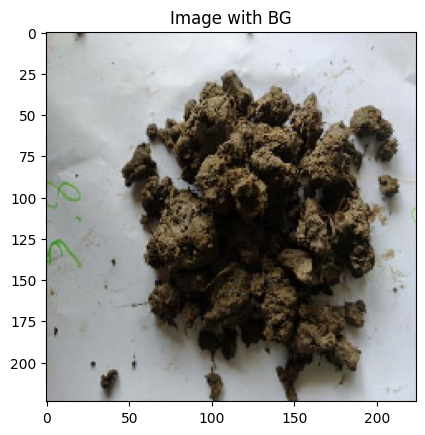

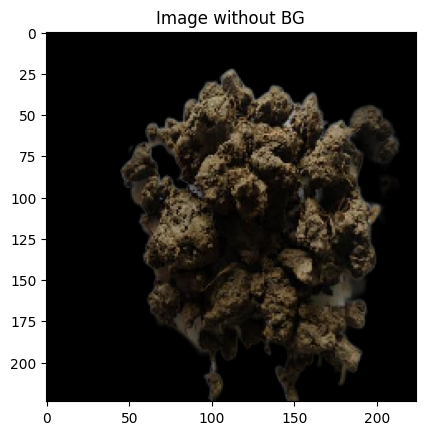

In [6]:
## Showing Sample Images

colorRawImage = cv2.cvtColor(rawImage, cv2.COLOR_BGR2RGB)
plt.imshow(colorRawImage)
plt.title('Image with BG')
plt.show()

colorProcessedImage = cv2.cvtColor(processedImage, cv2.COLOR_BGR2RGB)
plt.imshow(colorProcessedImage)
plt.title('Image without BG')
plt.show()

In [7]:
print("Train Images per Class", len(os.listdir('data//train//7')))
print("Validation Images per Class", len(os.listdir('data//val//7')))

Train Images per Class 303
Validation Images per Class 76


In [8]:
trainGenerator = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    width_shift_range=0.4,
                                    height_shift_range=0.4,
                                    rotation_range=45,
                                    preprocessing_function=preprocessing_function,
                                    ).flow_from_directory(
                                            directory=trainPath,
                                            target_size=input_shape,
                                            class_mode='categorical',
                                            batch_size=batch_size
                                        )

valGenerator = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function=preprocessing_function,
                                  ).flow_from_directory(
                                        directory=valPath,
                                        target_size=input_shape,
                                        class_mode='categorical',
                                        batch_size=batch_size
                                    )

Found 839 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


 ## MODEL TRAINING

In [9]:
tf_model = inception_v3.InceptionV3(include_top=False,
                            weights="imagenet",
                            input_shape= input_shape+(channels,)
                            )

In [10]:

model = Sequential()
model.add(tf_model)
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=2048, kernel_regularizer=L2()))
# model.add(layers.LeakyReLU())
# model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=2048, kernel_regularizer=L2()))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=2048, kernel_regularizer=L2()))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(1e-4),
                metrics=['acc']
                )

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=6, min_lr=1e-8)
es = EarlyStopping(monitor='loss', patience=10)

history = model.fit(trainGenerator, validation_data = valGenerator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/256
210/210 [==============================] - 30s 96ms/step - loss: 19.5455 - acc: 0.3361 - val_loss: 17.0472 - val_acc: 0.3714 - lr: 1.0000e-04
Epoch 2/256
210/210 [==============================] - 16s 76ms/step - loss: 14.7821 - acc: 0.4184 - val_loss: 12.6670 - val_acc: 0.3905 - lr: 1.0000e-04
Epoch 3/256
210/210 [==============================] - 16s 75ms/step - loss: 10.8534 - acc: 0.4505 - val_loss: 9.6277 - val_acc: 0.3143 - lr: 1.0000e-04
Epoch 4/256
210/210 [==============================] - 16s 75ms/step - loss: 7.9359 - acc: 0.4720 - val_loss: 6.9023 - val_acc: 0.3952 - lr: 1.0000e-04
Epoch 5/256
210/210 [==============================] - 16s 76ms/step - loss: 5.8314 - acc: 0.4899 - val_loss: 5.3617 - val_acc: 0.3429 - lr: 1.0000e-04
Epoch 6/256
210/210 [==============================] - 16s 76ms/step - loss: 4.3538 - acc: 0.5495 - val_loss: 4.1658 - val_acc: 0.4048 - lr: 1.0000e-04
Epoch 7/256
210/210 [==============================] - 16s 76ms/step - loss: 3.3376

### TRAINING RESULTS


In [20]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  30
Final Train Loss: 0.5915
Final Validation Loss: 3.1877
Final Test Accuracy: 0.8141
Final Test Accuracy: 0.4810


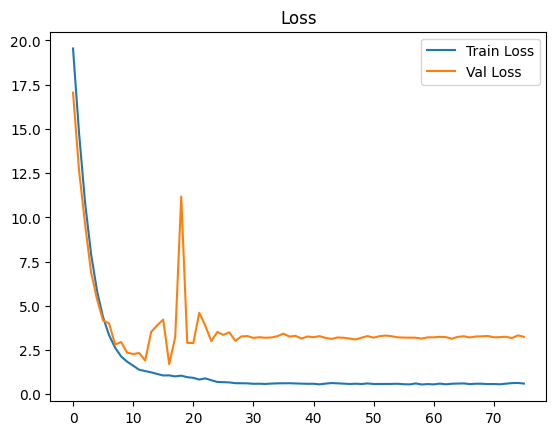

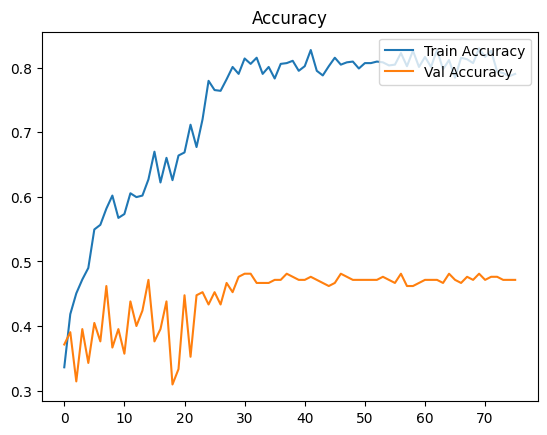

In [14]:

plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["Train Loss", "Val Loss"], loc="upper right")
plt.show()

plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Accuracy")
plt.legend(["Train Accuracy", "Val Accuracy"], loc="upper right")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


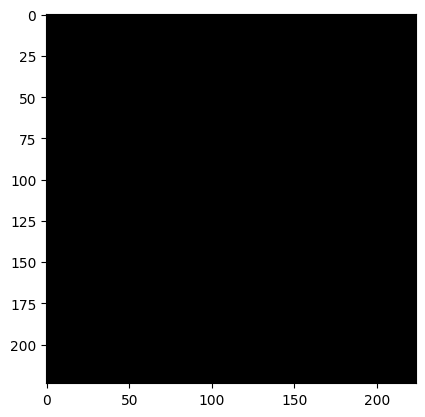

In [15]:
# Pre-processing the image
img_path= "noBgData//6//43--10-_png.rf.515324d7c28acb83c837f6b6ebcf68f7.png"

img = image.load_img(img_path, target_size = input_shape)
img_tensor = image.img_to_array(img)
img_tensor = preprocessing_function(img_tensor)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)

In [16]:
layers = [layer for layer in model.layers[0].layers]
conv_layers = [layer for layer in layers if "conv" in layer.name]
sample_layers = [layer for n,layer in enumerate(conv_layers) if n%50 == 0]

print(layers[:5])

[<keras.engine.input_layer.InputLayer object at 0x00000201F684E640>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000201F68809A0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000201F6884D90>, <keras.layers.core.activation.Activation object at 0x00000201F6763C10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000201F8A14550>]


In [17]:
def plot_map(layer_activation=0, row=4, col=8):
    # plot all maps
    ix = 1
    for _ in range(col):
        for _ in range(row):
            # specify subplot and turn of axis
            ax = plt.subplot(row, col, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(layer_activation[0, :, :, ix-1], cmap='viridis')
            ix += 1
    # show the figure
    plt.show()

1/1 [==============================] - 2s 2s/step


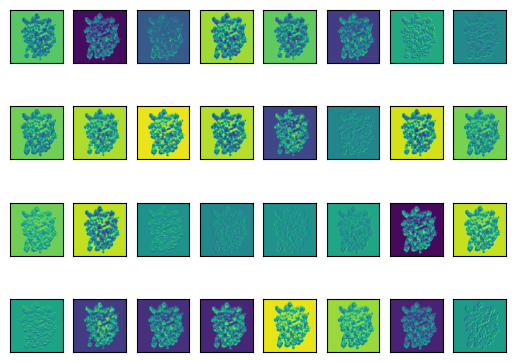

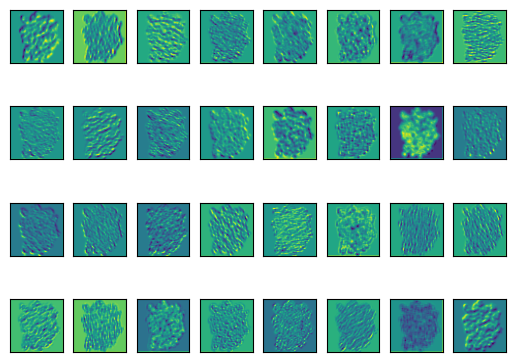

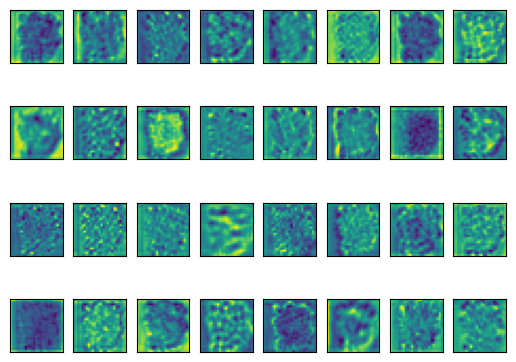

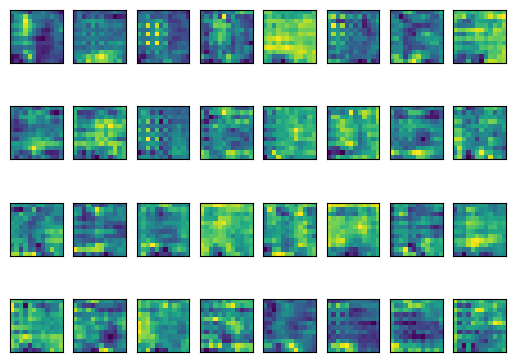

IndexError: list index out of range

In [22]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in conv_layers]
activation_model = models.Model(inputs = model.layers[0].input, outputs = layer_outputs)
feature_maps = activation_model.predict(img_tensor)

## Showing Feature maps
plot_map(feature_maps[0])
plot_map(feature_maps[4])
plot_map(feature_maps[16])
plot_map(feature_maps[64])
# plot_map(feature_maps[200])



## MODEL TESTING

## SAVING